In [3]:
# Load population data

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load population data
population = pd.read_csv(r"C:\Users\marle\OneDrive\Documents\Coding\Coffee Time Series Analysis\Annual Total World Population.csv")
print(population.head())
print(population.tail())
# Rename yield column
population.rename(columns={'Total World Population': 'Population'}, inplace = True)
print(population.head())

# Load coffee price data
# Load robusta prices
robusta_prices = pd.read_csv(r"C:\Users\marle\OneDrive\Documents\Coding\Coffee Time Series Analysis\PCOFFROBUSDM.csv")

# Load other mild prices
other_mild_prices = pd.read_csv(r"C:\Users\marle\OneDrive\Documents\Coding\Coffee Time Series Analysis\PCOFFOTMUSDM.csv")

# Start all series in 1990 and end all series in 2023
robusta_prices = robusta_prices.head(len(robusta_prices) - 9)
other_mild_prices = other_mild_prices.head(len(other_mild_prices) - 9)
population = population.tail(len(population) - 30)
print(robusta_prices.head())
print(robusta_prices.tail())
print(other_mild_prices.head())
print(other_mild_prices.tail())
print(population.head())
print(population.tail())

# Create annual average prices for robusta and other mild prices to assess relationship with annual population data
'Annual Average Coffee Bean Prices'
# Create time index for annual mean calculation
robusta_prices.loc[:, 'DATE'] = pd.to_datetime(robusta_prices['DATE'])
robusta_prices.set_index('DATE', inplace=True)
other_mild_prices.loc[:, 'DATE'] = pd.to_datetime(other_mild_prices['DATE'])
other_mild_prices.set_index('DATE', inplace=True)
annual_robusta = robusta_prices.resample('YE').mean()
annual_other_mild = other_mild_prices.resample('YE').mean()
print(annual_robusta.head())
print(annual_robusta.tail())
print(annual_other_mild.head())
print(annual_other_mild.tail())

# Merge series to the same dataframe
population.loc[:, 'Year_only'] = population['Year']
# Convert 'Year' to datetime and extract the year
annual_other_mild = annual_other_mild.reset_index().rename(columns={'DATE': 'Year'})
annual_robusta = annual_robusta.reset_index().rename(columns={'DATE': 'Year'})
annual_other_mild.loc[:, 'Year'] = pd.to_datetime(annual_other_mild['Year'])
annual_other_mild.loc[:, 'Year_only'] = annual_other_mild['Year'].dt.year
annual_robusta.loc[:, 'Year'] = pd.to_datetime(annual_robusta['Year'])
annual_robusta.loc[:, 'Year_only'] = annual_robusta['Year'].dt.year

combined_df = pd.merge(population[['Year_only', 'Population']], annual_other_mild[['Year_only', 'PCOFFOTMUSDM']], on='Year_only', how='inner')
combined_df = pd.merge(combined_df, annual_robusta[['Year_only', 'PCOFFROBUSDM']], on='Year_only', how='inner')
print(combined_df)

   Year  Total World Population
0  1960              3031517384
1  1961              3072470012
2  1962              3126894230
3  1963              3193470069
4  1964              3260479625
    Year  Total World Population
59  2019              7742724795
60  2020              7821271846
61  2021              7888963821
62  2022              7951595433
63  2023              8024997028
   Year  Population
0  1960  3031517384
1  1961  3072470012
2  1962  3126894230
3  1963  3193470069
4  1964  3260479625
         DATE  PCOFFROBUSDM
0  1990-01-01     50.520000
1  1990-02-01     51.299999
2  1990-03-01     57.680000
3  1990-04-01     57.389999
4  1990-05-01     55.029999
           DATE  PCOFFROBUSDM
403  2023-08-01    124.356522
404  2023-09-01    123.891429
405  2023-10-01    118.835000
406  2023-11-01    122.775909
407  2023-12-01    135.391905
         DATE  PCOFFOTMUSDM
0  1990-01-01     75.829987
1  1990-02-01     84.010010
2  1990-03-01     93.959991
3  1990-04-01     93.730011
4 

C:\Users\marle\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
C:\Users\marle\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [5]:
# Summary statistics

print(population['Population'].describe())

count    3.400000e+01
mean     6.683230e+09
std      8.313052e+08
min      5.293498e+09
25%      6.000492e+09
50%      6.676373e+09
75%      7.382514e+09
max      8.024997e+09
Name: Population, dtype: float64


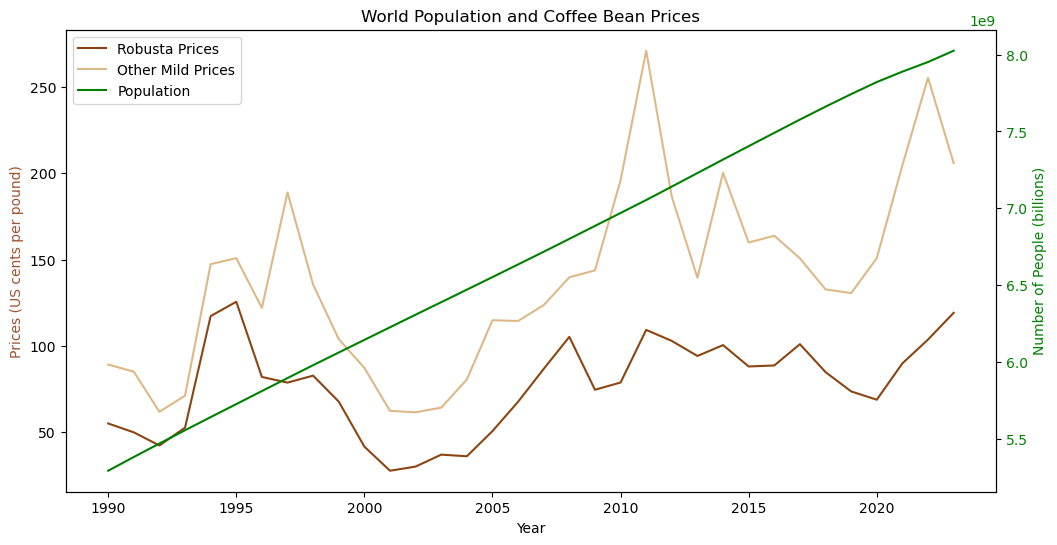

'\nWorld population has steadily increased in the period under consideration.\nWorld population will act similarly to a time trend as the increases look relatively uniform.\nThe rate of population growth slows ever so slightly towards the end of the series.\n'

In [7]:
# Plot of world population against coffee production
'''
# Ensure numeric values
if not combined_df['Year_only'].dtype not in ['int64', 'float64']:
    combined_df.loc[:, 'Year_only'] = pd.to_numeric(combined_df['Year_only'])
if not combined_df['Population'].dtype not in ['int64', 'float64']:
    combined_df.loc[:, 'Population'] = pd.to_numeric(combined_df['Population'].str.replace(',', ''))
'''
fig, ax1 = plt.subplots(figsize=(12, 6))
line1 = ax1.plot(combined_df['Year_only'], combined_df['PCOFFROBUSDM'], label='Robusta Prices', color='saddlebrown')
line2 = ax1.plot(combined_df['Year_only'], combined_df['PCOFFOTMUSDM'], label='Other Mild Prices', color='burlywood')
ax1.set_xlabel('Year')
ax1.set_ylabel('Prices (US cents per pound)', color='sienna')

# Create a second y-axis for production
ax2 = ax1.twinx()
line3 = ax2.plot(combined_df['Year_only'], combined_df['Population'], label='Population', color='green')
ax2.set_ylabel('Number of People (billions)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('World Population and Coffee Bean Prices')

# Unified legend
lines = line1 + line2 + line3
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')

plt.show()
fig.savefig(r'C:\Users\marle\OneDrive\Documents\Coding\Coffee Time Series Analysis\World Population and Coffee Bean Prices.png')
'''
World population has steadily increased in the period under consideration.
World population will act similarly to a time trend as the increases look relatively uniform.
The rate of population growth slows ever so slightly towards the end of the series.
'''


In [9]:
# Pearson's Rank Correlation Coefficient
from scipy.stats import pearsonr

print('\nRobusta Correlations')
robusta_pop_corr, robusta_pop_p_value = pearsonr(combined_df['Population'], combined_df['PCOFFROBUSDM'])
print(f'Production Pearson correlation: {robusta_pop_corr} P-value: {robusta_pop_p_value}')

print('\nOther Mild Correlations')
other_mild_pop_corr, other_mild_pop_p_value = pearsonr(combined_df['Population'], combined_df['PCOFFOTMUSDM'])
print(f'Production Pearson correlation: {other_mild_pop_corr} P-value: {other_mild_pop_p_value}')

'''
The coffee price series both generally seem to be trending upwards so they display correlation with the steadily upwards-trending population series.
Visually, it makes sense that the price of other mild beans has a higher degree of correlation and a statistically more significant relationship with population than robusta prices.
'''


Robusta Correlations
Production Pearson correlation: 0.42787540822617465 P-value: 0.01159252889001612

Other Mild Correlations
Production Pearson correlation: 0.6142576060079608 P-value: 0.00011139285244085714


'\nThe coffee price series both generally seem to be trending upwards so they display correlation with the steadily upwards-trending population series.\nVisually, it makes sense that the price of other mild beans has a higher degree of correlation and a statistically more significant relationship with population than robusta prices.\n'


***ADF stationarity test***
ADF (constant only) test of population data
ADF test statistic: -0.4036295135117788 P-value: 0.9094910125267985
(-0.4036295135117788, 0.9094910125267985, 10, 23, {'1%': -3.7529275211638033, '5%': -2.998499866852963, '10%': -2.6389669754253307}, 739.291930613535)
Visually, it is clear that the population series does not have a constant mean over time

***ADF trend-stationarity test***
ADF (constant + trend only) test of population data
ADF test statistic: -1.458743870465611 P-value: 0.8428352232879357
(-1.458743870465611, 0.8428352232879357, 10, 23, {'1%': -4.417148310183283, '5%': -3.6221875096572695, '10%': -3.248726452699926}, 736.8886070025479)
The ADF test does not provide much evidence against the null hypothesis that population is not trend stationary.

Differenced World Population
    Year_only  Population  PCOFFOTMUSDM  PCOFFROBUSDM  Population_diff
0        1990  5293498452     89.147504     54.986667              NaN
1        1991  5382640911     

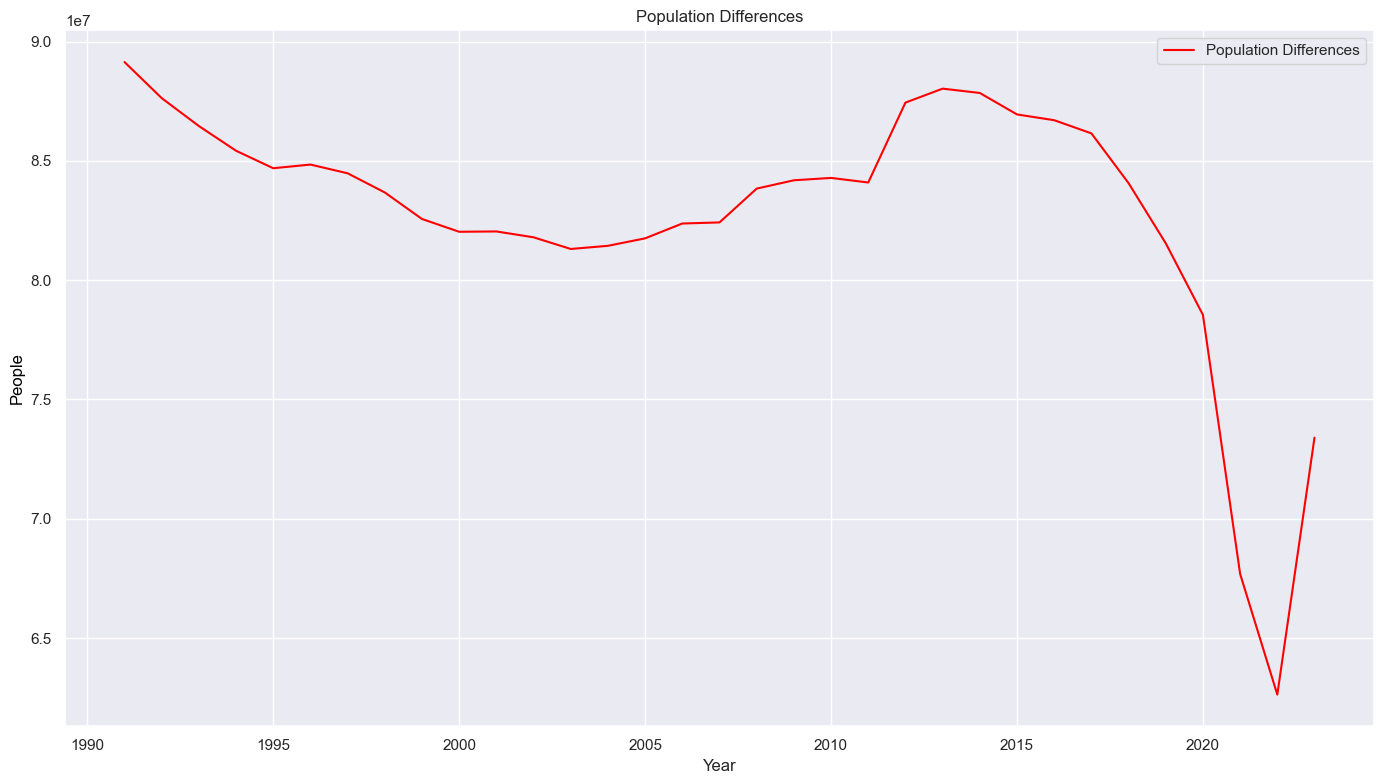

ADF test statistic: -2.9808652005586738 P-value: 0.0367204025413806
(-2.9808652005586738, 0.0367204025413806, 9, 23, {'1%': -3.7529275211638033, '5%': -2.998499866852963, '10%': -2.6389669754253307}, 707.4855658893719)

KPSS (constant only) test of population differences
KPSS (constant-only) test statistic: 0.29583314740781425 P-value: 0.1
(0.29583314740781425, 0.1, 3, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


C:\Users\marle\AppData\Local\Temp\ipykernel_13892\490315458.py:42: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(x = combined_df['Population_diff'].dropna(), regression = "c")


'\nAccording to the ADF test, we should reject the null hypothesis in favour of the alternative hypothesis that differenced population is a stationary series at the 5% significance level.\nAccording to the KPSS test, we cannot reject the null hypothesis that differenced population is a stationary time series.\nSo we should treat differenced population as stationary.\n'

In [33]:
# Stationarity Analysis
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

# ADF stationarity test
# The null hypothesis is that there is a unit root. The alternative hypothesis that there is no unit root (stationary).
print('\n***ADF stationarity test***')
print('ADF (constant only) test of population data')
result = adfuller(combined_df['Population'], regression = "c")
print(f'ADF test statistic: {result[0]} P-value: {result[1]}')
print(result)

print('Visually, it is clear that the population series does not have a constant mean over time')

# Is population trend-stationary?
print('\n***ADF trend-stationarity test***')
print('ADF (constant + trend only) test of population data')
result = adfuller(combined_df['Population'], regression = "ct")
print(f'ADF test statistic: {result[0]} P-value: {result[1]}')
print(result)
print('The ADF test does not provide much evidence against the null hypothesis that population is not trend stationary.')

# Is differenced population stationary?
print("\nDifferenced World Population")
combined_df['Population_diff'] = combined_df['Population'] - combined_df['Population'].shift()
print(combined_df)
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year_only', y='Population_diff', data=combined_df, label='Population Differences', color='red')
plt.title('Population Differences')
plt.xlabel('Year')
plt.ylabel('People', color='black')
sns.set_theme()
plt.tight_layout()
plt.savefig(r'C:\Users\marle\OneDrive\Documents\Coding\Coffee Time Series Analysis\Population Differences.png')
plt.show()

# Ensure the NA from differencing is removed before the ADF test
result = adfuller(combined_df['Population_diff'].dropna(), regression = "c")
print(f'ADF test statistic: {result[0]} P-value: {result[1]}')
print(result)
print('\nKPSS (constant only) test of population differences')
result = kpss(x = combined_df['Population_diff'].dropna(), regression = "c")
print(f'KPSS (constant-only) test statistic: {result[0]} P-value: {result[1]}')
print(result)

'''
According to the ADF test, we should reject the null hypothesis in favour of the alternative hypothesis that differenced population is a stationary series at the 5% significance level.
According to the KPSS test, we cannot reject the null hypothesis that differenced population is a stationary time series.
So we should treat differenced population as stationary.
'''